# Notebook 4: Pandas and TF binding site analysis

Here we will start using Pandas. Pandas is the standard way of working with columnar data in Python. However, there is a substantial learning curve. If you want to learn more about Pandas, here is a useful site: http://pandas.pydata.org/

Here we will use Pandas to analyze transcription factor (TF) binding sites from *Escherichia coli*. We will first focus on CRP, a major regulator in *E. coli* with over 350 functional binding sites.  

## Part 1

In [1]:
# Put this first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import logomaker; we will use this later for visualizing TF motifs.
import logomaker 

In [3]:
# We will be analyzing a standing database of TF binding sites, which is available on RegulonDB. 
# Here is a command for downloading this file
!curl "http://regulondb.ccg.unam.mx/menu/download/datasets/files/BindingSiteSet.txt" -o BindingSiteSet.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  959k  100  959k    0     0   962k      0 --:--:-- --:--:-- --:--:--  966k


In [4]:
# Let's see what this database looks like
!head -n 50 old_BindingSiteSet.txt

# Copies and Copyright-Notice
#
#      RegulonDB is free for academic/noncommercial use
#
#      User is not entitled to change or erase data sets of the RegulonDB
#      database or to eliminate copyright notices from RegulonDB. Furthermore,
#      User is not entitled to expand RegulonDB or to integrate RegulonDB partly
#      or as a whole into other databank systems, without prior written consent
#      from CCG-UNAM.
#
#      Please check the license at http://regulondb.ccg.unam.mx/menu/download/full_version/terms_and_conditions.jsp
#
# Citation
#
#      Santos-Zavaleta A et al. (2019). "RegulonDB v 10.5: tackling challenges to unify classic and high throughput knowledge of gene regulation in E. coli K-12.",
#      Nucleic Acids Res. 2019 Jan 8;47(D1):D212-D220. doi: 10.1093/nar/gky1077.
#
#
# Contact
#
#      Person: RegulonDB Team
#      Web Page: http://regulondb.ccg.unam.mx/menu/about_regulondb/contact_us/index.jsp
#          (regulondb@ccg.unam.mx)
#
#
# Release: 10.6 Date: 7

In [5]:
# To parse this file, use Pandas's method read_csv. 
# We pass the name of this file, as well as other keyword arguments:
#     sep='\t': columns are delimited by tabs
#     comment='#': ignore rows that begin with this
#     header=None: the first row is NOT the name of the columns
# The results are stored as an object known as a dataframe
df = pd.read_csv("old_BindingSiteSet.txt", 
                 sep='\t', 
                 comment='#', 
                 header=None)

# Tells us that we're working with a DataFrame object
print(type(df))

# To check that the data has been properly loaded, call the method df.head()
df.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ECK120015994,AcrR,ECK125258528,485709,485732,reverse,ECK120033472,acrAB,-,acrAp,-22.5,gcgttagattTACATACATTTGTGAATGTATGTAccatagcacg,"[BCE|W|Binding of cellular extracts],[GEA|W|Ge...",Strong
1,ECK120015994,AcrR,ECK125258528,485709,485732,forward,ECK125134945,acrR,-,acrRp,22.5,cgtgctatggTACATACATTCACAAATGTATGTAaatctaacgc,"[BCE|W|Binding of cellular extracts],[GEA|W|Ge...",Strong
2,ECK120015994,AcrR,ECK125202663,1619048,1619058,forward,ECK125202664,marRAB,-,marRp,-40.5,catcggtcaaTTCATTCATTTgacttatact,"[GEA|W|Gene expression analysis],[BPP|S|Bindin...",Strong
3,ECK120015994,AcrR,ECK125242724,1978422,1978432,reverse,ECK125242725,flhDC,-,flhDp,-31.5,agcccccctcCGTTGTATGTGcgtgtagtga,"[GEA|W|Gene expression analysis],[HIBSCS|W|Hum...",Weak
4,ECK120015994,AcrR,ECK120035040,2313112,2313135,forward,ECK120035041,micF,-,micFp,41.0,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt,[AIBSCS|W|Automated inference based on similar...,Weak


In [6]:
# You get the number of rows and columns from the attribute df.shape
df.shape

(3674, 14)

In [8]:
# We only want the TF name (column 1) and the TF binding site sequence (column 13)
# To keep only these columns, index the df using a list of column names you want (in the order you want)
col_names = [1,11]
df = df[col_names]
df.head()

,1,11
0,AcrR,gcgttagattTACATACATTTGTGAATGTATGTAccatagcacg
1,AcrR,cgtgctatggTACATACATTCACAAATGTATGTAaatctaacgc
2,AcrR,catcggtcaaTTCATTCATTTgacttatact
3,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt


In [9]:
# Data frames allow users to give columns meaningful names.
# To rename the columns, set df.columns to a list of the desired names.
df.columns = ['tf','site']
df.tail()

,tf,site
3669,ZraR,gctgcgggtaGCGAGTCATTTTTACTCattgaaactt
3670,Zur,gtatctttatGGTTATGTTATAACATAACAGGTAaaaatgatga
3671,Zur,atgaatatgaGAAGTGTGATATTATAACATTTCAtgactactgc
3672,Zur,gcagtagtcaTGAAATGTTATAATATCACACTTCtcatattcat
3673,Zur,tgcattttgcTATATGTTACAATATAACATTACacatcatata


In [10]:
# Note that the last two modifications of df can be accomplished in one line 
df = pd.read_csv("old_BindingSiteSet.txt", 
                 sep='\t', 
                 comment='#',
                 header=None, 
                 usecols=[1,11], 
                 names=['tf','site'])
df.head()

,tf,site
0,AcrR,gcgttagattTACATACATTTGTGAATGTATGTAccatagcacg
1,AcrR,cgtgctatggTACATACATTCACAAATGTATGTAaatctaacgc
2,AcrR,catcggtcaaTTCATTCATTTgacttatact
3,AcrR,agcccccctcCGTTGTATGTGcgtgtagtga
4,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt


In [7]:
# Check out the pd.read_csv() documentation for a full list
pd.read_csv?

In [11]:
# Dataframe columns are called 'Series' objects. 
# Essentially, they're numpy arrays with some extra sugar.
col = df['tf']
print(type(col))
col.head()

<class 'pandas.core.series.Series'>


0    AcrR
1    AcrR
2    AcrR
3    AcrR
4    AcrR
Name: tf, dtype: object

In [12]:
# You can extract an element from a dataframe by using .loc[]
df.loc[3,'site']

'agcccccctcCGTTGTATGTGcgtgtagtga'

Our goal is to generate sequence logos that represents the binding preferences of TFs in this database.  As a concrete example we'll use CRP, which has a well-characterized binding motif shown here:

<img src="crp_information_logo.png" alt="Drawing" style="width: 700px;"/>

In [15]:
# Choose a TF
tf = 'CRP'

# Flag which rows in the dataframe have the correct TF name
flags = (df['tf']==tf)

# Grab those rows. To be safe use copy() to make sure that, if we
# alter tf_df, df itself doesn't change
tf_df = df[flags].copy().reset_index(drop=True)
tf_df.head(20)

,tf,site
0,CRP,NaN
1,CRP,NaN
2,CRP,NaN
3,CRP,NaN
4,CRP,NaN
5,CRP,NaN
6,CRP,NaN
7,CRP,NaN
8,CRP,NaN
9,CRP,NaN


In [16]:
# To get rid of rows with missing data, use dropna
tf_df.dropna(inplace=True)
tf_df.head()

,tf,site
12,CRP,ttgatgacatAAGCAGGATTTAGCTCACACTTatcgacggtg
13,CRP,acccgaaacaAAAATGTGATACCAATCACAGAAtacagcttat
14,CRP,gactttcaatATTGGTGATCCATAAAACAATAttgaaaattt
15,CRP,tgttttcaatATTGGTGAGGAACTTAACAATAttgaaagttg
16,CRP,tccacattgaTTATTTGCACGGCGTCACACTTtgctatgcca


In [17]:
# Each DNA binding site should be capitalized.
# To do this, we reset 'site' column of tf_df

# Get list of capitalized sites and replace the 'site' column with this
capitalized_sites = [site.upper() for site in tf_df['site']]
tf_df['site'] = capitalized_sites
tf_df.head()

,tf,site
12,CRP,TTGATGACATAAGCAGGATTTAGCTCACACTTATCGACGGTG
13,CRP,ACCCGAAACAAAAATGTGATACCAATCACAGAATACAGCTTAT
14,CRP,GACTTTCAATATTGGTGATCCATAAAACAATATTGAAAATTT
15,CRP,TGTTTTCAATATTGGTGAGGAACTTAACAATATTGAAAGTTG
16,CRP,TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCA


In [18]:
# In order to derive a motif, all sites we analyze need to be the same length.
# It's good to check that this is actually the case.
# We therefore add a column to tf_df listing the length of each site

# Compute the length of each site and record this in a 'length' column
site_lengths = [len(site) for site in tf_df['site']]
tf_df['length'] = site_lengths
tf_df.head()

,tf,site,length
12,CRP,TTGATGACATAAGCAGGATTTAGCTCACACTTATCGACGGTG,42
13,CRP,ACCCGAAACAAAAATGTGATACCAATCACAGAATACAGCTTAT,43
14,CRP,GACTTTCAATATTGGTGATCCATAAAACAATATTGAAAATTT,42
15,CRP,TGTTTTCAATATTGGTGAGGAACTTAACAATATTGAAAGTTG,42
16,CRP,TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCA,42


## Exercises, part 1

**E4.1.** Extract the `length` column of `tf_df` as a Series object, then use the `value_counts()` method to get a new Series object that lists number of times each length occurs.

In [ ]:
# Answer here

**E4.2.** Apparently there are sites of a bunch of different lengths. Use the ```idxmax()``` method on the result above to determine which binding site length is most common.

In [ ]:
# Answer here

**E4.3.** Remove rows from `tf_df` that do not correspond to the most common length.

In [ ]:
# Answer here

## Part 2

In [19]:
# The anwers to the above exercises in one cryptic line of code
tf_df = tf_df[tf_df['length']==tf_df['length'].value_counts().idxmax()] 
tf_df.head()

,tf,site,length
12,CRP,TTGATGACATAAGCAGGATTTAGCTCACACTTATCGACGGTG,42
14,CRP,GACTTTCAATATTGGTGATCCATAAAACAATATTGAAAATTT,42
15,CRP,TGTTTTCAATATTGGTGAGGAACTTAACAATATTGAAAGTTG,42
16,CRP,TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCA,42
17,CRP,TGGCATAGCAAAGTGTGACGCCGTGCAAATAATCAATGTGGA,42


In [20]:
# Now extract the 'site' column from tf_df
sites = tf_df['site']
sites.head()

12    TTGATGACATAAGCAGGATTTAGCTCACACTTATCGACGGTG
14    GACTTTCAATATTGGTGATCCATAAAACAATATTGAAAATTT
15    TGTTTTCAATATTGGTGAGGAACTTAACAATATTGAAAGTTG
16    TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCA
17    TGGCATAGCAAAGTGTGACGCCGTGCAAATAATCAATGTGGA
Name: site, dtype: object

In [22]:
logomaker.alignment_to_matrix?

In [21]:
# Using logomaker.alignment_to_matrix function, compute the number of times each base occurs at each position
# Note that this returns a dataframe
counts_mat = logomaker.alignment_to_matrix(sites)
counts_mat.head()

,A,C,G,T
pos,,,,
0,97.0,54.0,47.0,114.0
1,82.0,69.0,56.0,105.0
2,97.0,62.0,68.0,85.0
3,84.0,65.0,76.0,87.0
4,88.0,70.0,73.0,81.0


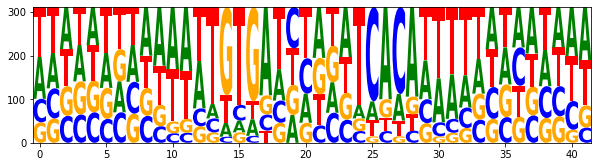

In [23]:
# This counts matrix can be visualized as a sequence logo
logomaker.Logo(counts_mat)

## Exercises, part 2

**E4.4.** Counts logos shown above aren't what people use in publications. Rather, they typically use "information" logos, like the one shown earlier. By making use of the keyword argument  `to_type='information'` in the function `logomaker.alignment_to_matrix()`, create a CRP information logo.

In [ ]:
# Answer here

**E4.5.** Again using the `value_counts()` method, determine how many binding sites there are for each transcription factor.

In [ ]:
# Answer here

**E4.6.** Fill out the function below so that the user can pass the name of any TF and get list of aligned sites back. Test that it works, e.g. on `tf='FNR'`, by getting a list of sites and making an information logo. Also test that it fails when it is supposed to.

In [ ]:
# Now let's turn this into a function 
def get_tf_sites(tf):
    """
    Fill in docstring here
    """
   
    # Load database
    df = pd.read_csv("old_BindingSiteSet.txt", 
                     sep='\t', 
                     comment='#',
                     header=None, 
                     usecols=[1,11], 
                     names=['tf','site'])
    
    # 
    # Fill in stuff here
    # 
    
    # Get sequence alignment and return it
    return tf_df['site']
